In [6]:
#lets load dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split,StratifiedKFold, cross_val_score, learning_curve, cross_validate, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier,RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [7]:
#loading dataset to pandas dataframe
indian = pd.read_csv(r"C:\Users\bharathi.v04\Downloads\DS\indian_liver_patient.csv")

In [8]:
#print first rows of dataset
indian.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [9]:
indian.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [10]:
#total rows and columns indataset
indian.shape

(583, 11)

In [11]:
indian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [12]:
indian.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [13]:
#finding null value
indian.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [14]:
indian.dropna(axis=0,inplace=True)

In [15]:
#checking for the duplicate values
indian_1_copy = indian.copy()
indian_1_copy.drop_duplicates(inplace=True)
print('Number of duplicate rows: ',indian.shape[0] - indian_1_copy.shape[0])

Number of duplicate rows:  13


In [16]:
indian = indian_1_copy.copy()
indian.head()
indian.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 566 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         566 non-null    int64  
 1   Gender                      566 non-null    object 
 2   Total_Bilirubin             566 non-null    float64
 3   Direct_Bilirubin            566 non-null    float64
 4   Alkaline_Phosphotase        566 non-null    int64  
 5   Alamine_Aminotransferase    566 non-null    int64  
 6   Aspartate_Aminotransferase  566 non-null    int64  
 7   Total_Protiens              566 non-null    float64
 8   Albumin                     566 non-null    float64
 9   Albumin_and_Globulin_Ratio  566 non-null    float64
 10  Dataset                     566 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 53.1+ KB


## EDA

<AxesSubplot:xlabel='Gender', ylabel='count'>

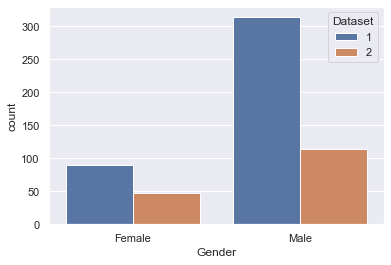

In [19]:
sns.set_theme()
sns.countplot(x='Gender',data=indian,hue='Dataset')

In [21]:
indian[['Dataset','Gender','Age']].groupby(['Dataset','Gender'],
                                           as_index=False).count().sort_values(by='Dataset',ascending=False)

,Dataset,Gender,Age
2,2,Female,48
3,2,Male,114
0,1,Female,90
1,1,Male,314


In [22]:
# correlation
corr = indian.corr()

<AxesSubplot:>

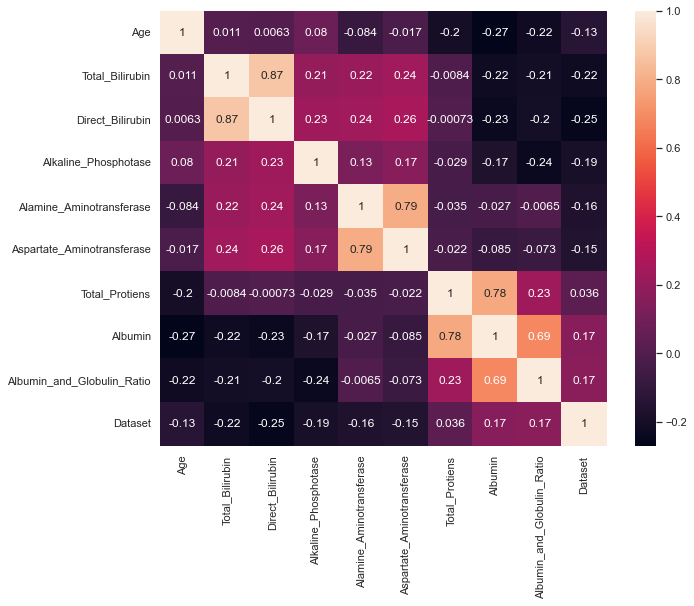

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,fmt='.2g')

We can see very high correlation between :

Direct_Bilirubin and Total_Bilirubin : 0.87
    
Aspartate_Aminotransferase and Alamine_Aminotransferase : 0.79
    
Total_Protiens and Albumin : 0.78
    
Albumin_and_Globulin_Ratio and Albumin : 0.69
    
Hence we can eliminate one of these variables

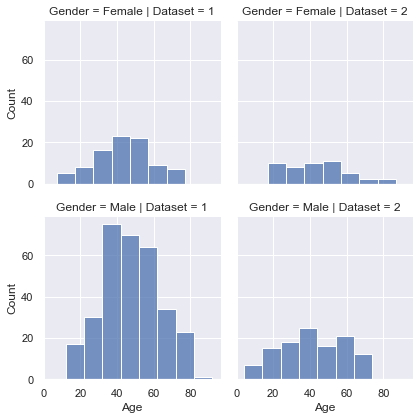

In [27]:
g = sns.FacetGrid(data=indian,col='Dataset',row='Gender')
g.map_dataframe(sns.histplot, x='Age',binwidth=10)
g.set_axis_labels('Age',"Count")

In [28]:
#convert categorical variable to indicator variable
indian = pd.get_dummies(indian,prefix='Gender',columns=['Gender'])

In [29]:
#drop the variable with high correlation
indian.drop(axis=1,columns=["Direct_Bilirubin", "Aspartate_Aminotransferase", "Total_Protiens"],inplace=True)

In [30]:
X = indian.drop(columns='Dataset',axis=1)
Y = indian['Dataset']

In [31]:
#split the dataset for training and test data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=0,stratify=indian['Dataset'])

In [33]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Model Evaluation

In [38]:
lr_reg = LogisticRegression(n_jobs=1,solver='newton-cg',random_state=55)

In [39]:
cv = StratifiedKFold(10, shuffle=True, random_state=42)

In [41]:
cv_results =cross_validate(lr_reg,X_train_scaled,Y_train,cv=cv,scoring='f1_macro',return_train_score=True)

In [42]:
print("Training Score : ",cv_results['train_score'].mean())

Training Score :  0.4819252408050338


## Stacking Models

In [43]:
estimators =[
    ('rf',RandomForestClassifier(random_state=55,class_weight='balanced_subsample')),
    ('gb',GradientBoostingClassifier(random_state=55),
    ('xgb',XGBClassifier(random_state=55)),
    )
]

In [44]:
clf = StackingClassifier(
estimators=estimators,final_estimator=RandomForestClassifier(random_state=55),cv=5)

In [45]:
clf.fit(X_train,Y_train).score(X_test,Y_test)

0.7058823529411765

In [46]:
pred = clf.predict(X_test)

In [50]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score

In [52]:
print("Training Classification report\n",classification_report(Y_train,clf.predict(X_train)))
print("_______"*40)
print("Testing classification report\n",classification_report(Y_test, pred))

Training Classification report
               precision    recall  f1-score   support

           1       0.82      0.91      0.87       283
           2       0.70      0.51      0.59       113

    accuracy                           0.80       396
   macro avg       0.76      0.71      0.73       396
weighted avg       0.79      0.80      0.79       396

________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
Testing classification report
               precision    recall  f1-score   support

           1       0.75      0.88      0.81       121
           2       0.48      0.29      0.36        49

    accuracy                           0.71       170
   macro avg       0.62      0.58      0.58       170
weighted avg       0.67      0.71      0.68       170



In [54]:
cm = confusion_matrix(Y_test,pred)
cm

array([[106,  15],
       [ 35,  14]], dtype=int64)

<AxesSubplot:>

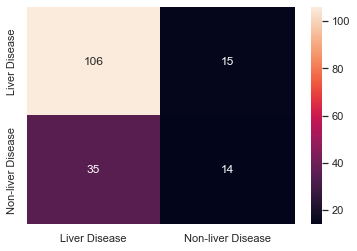

In [55]:
sns.heatmap(cm,fmt='g',annot=True,xticklabels=['Liver Disease','Non-liver Disease'],yticklabels=['Liver Disease','Non-liver Disease'])